Dipping Layer for MLMC
==============

Setup for simple dipping layer model as an input for MLMC


In [1]:
from matplotlib import rc_params

In [2]:
from IPython.core.display import HTML
css_file = 'pynoddy.css'
# HTML(open(css_file, "r").read())

In [3]:
import sys, os
import matplotlib.pyplot as plt
# adjust some settings for matplotlib
from matplotlib import rcParams
# print rcParams
rcParams['font.size'] = 15
# determine path of repository to set paths corretly below
repo_path = os.path.realpath('../..')
import pynoddy.history
reload(pynoddy.history)

<module 'pynoddy.history' from '/Users/flow/git/pynoddy/pynoddy/history.pyc'>

In [4]:
%matplotlib inline

In [5]:
rcParams.update({'font.size': 20})

### Swap to working directory

In [ ]:
os.chdir(r'/Users/flow/git/mlmc/case_studies/dipping_layer')

Defining a stratigraphy
--------------

We start with the definition of a (base) stratigraphy for the model. 

In [20]:
reload(pynoddy.history)
# Combined: model generation and output vis to test:
history = "simple_model.his"
output_name = "simple_out"
#
# A general note: the 'reload' statements are only important
# for development purposes (when modules were chnaged), but not
# in required for normal execution.
#
reload(pynoddy.history)
reload(pynoddy.events)

# create pynoddy object
nm = pynoddy.history.NoddyHistory()
# add stratigraphy
strati_options = {'num_layers' : 2,
                  'layer_names' : ['layer 1', 'layer 2'], 
                  'layer_thickness' : [1500, 1500]}
nm.add_event('stratigraphy', strati_options )

nm.write_history(history)


In [21]:
# Compute the model
reload(pynoddy)
pynoddy.compute_model(history, output_name) 

''

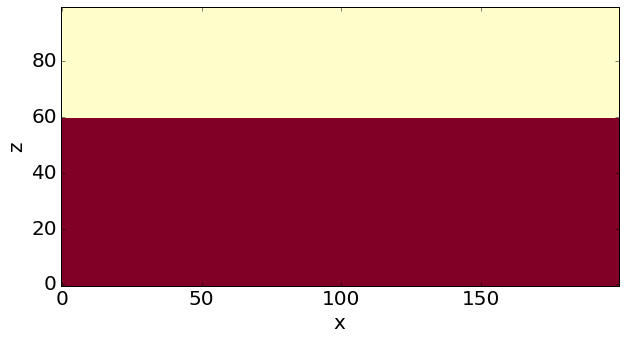

In [22]:
# Plot output
import pynoddy.output
reload(pynoddy.output)
nout = pynoddy.output.NoddyOutput(output_name)
nout.plot_section('y', layer_labels = strati_options['layer_names'][::-1], 
                  colorbar = True, title="",
                  savefig = False, fig_filename = "ex01_strati.eps")

## Add tilt event

In [41]:
# create pynoddy object
nm = pynoddy.history.NoddyHistory()
# add stratigraphy
strati_options = {'num_layers' : 2,
                  'layer_names' : ['layer 1', 'layer 2'], 
                  'layer_thickness' : [1500, 1500]}
nm.add_event('stratigraphy', strati_options )

tilt_options = {'name' : 'Tilt',
                'pos' : (6000, 0, 5000),
                'rotation' : 10,
               'plunge_direction' : 0,
               'plunge' : 20}

nm.add_event('tilt', tilt_options)
nm.events
nm.write_history(history)
# Compute the model
pynoddy.compute_model(history, output_name) 

''

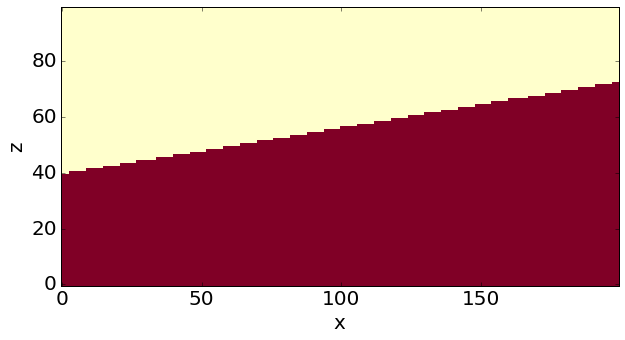

In [42]:
# Plot output
reload(pynoddy.output)
nout = pynoddy.output.NoddyOutput(output_name)
nout.plot_section('y', layer_labels = strati_options['layer_names'][::-1], 
                  colorbar = True, title = "",
                  savefig = False, fig_filename = "ex01_fault_E.eps")

### Calculate gravity field for tilted model

Compute now the gravity field



In [43]:
!pwd

/Users/flow/git/pynoddy/docs/notebooks


Add a fault event
----------

As a next step, let's now add the faults to the model.

In [10]:
# The following options define the fault geometry:
fault_options = {'name' : 'Fault_E',
                 'pos' : (6000, 0, 5000),
                 'dip_dir' : 270,
                 'dip' : 60,
                 'slip' : 1000}

nm.add_event('fault', fault_options)

In [11]:
nm.events

{1: <pynoddy.events.Stratigraphy at 0x107838fd0>,
 2: <pynoddy.events.Fault at 0x10782c310>}

In [12]:
nm.write_history(history)

In [13]:
# Compute the model
pynoddy.compute_model(history, output_name) 

''

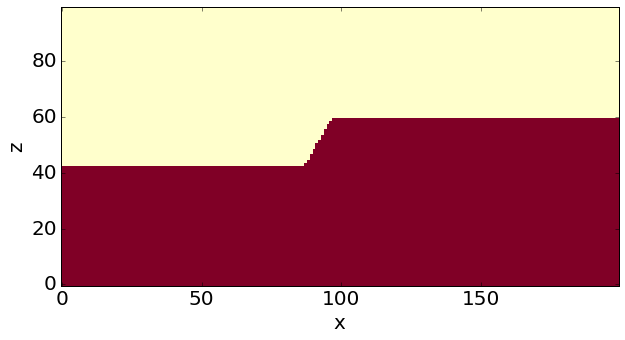

In [14]:
# Plot output
reload(pynoddy.output)
nout = pynoddy.output.NoddyOutput(output_name)
nout.plot_section('y', layer_labels = strati_options['layer_names'][::-1], 
                  colorbar = True, title = "",
                  savefig = False, fig_filename = "ex01_fault_E.eps")

In [15]:
# The following options define the fault geometry:
fault_options = {'name' : 'Fault_1',
                 'pos' : (5500, 3500, 0),
                 'dip_dir' : 270,
                 'dip' : 60,
                 'slip' : 1000}

nm.add_event('fault', fault_options)

In [16]:
nm.write_history(history)

In [17]:
# Compute the model
pynoddy.compute_model(history, output_name) 

''

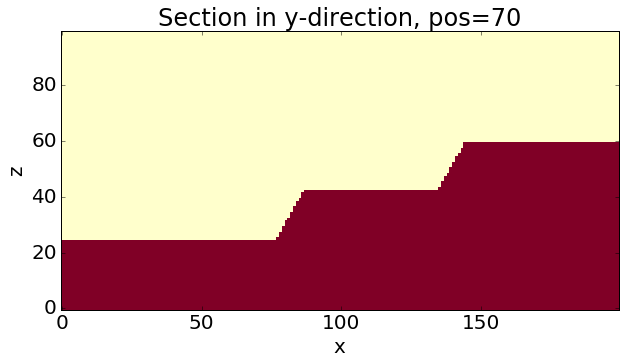

In [18]:
# Plot output
reload(pynoddy.output)
nout = pynoddy.output.NoddyOutput(output_name)
nout.plot_section('y', layer_labels = strati_options['layer_names'][::-1], colorbar = True)

In [19]:
nm1 = pynoddy.history.NoddyHistory(history)

IndexError: list index out of range

In [ ]:
nm1.get_extent()

Complete Model Set-up
--------------------

And here now, combining all the previous steps, the entire model set-up with base stratigraphy and two faults:

In [35]:
reload(pynoddy.history)
reload(pynoddy.events)
nm = pynoddy.history.NoddyHistory()
# add stratigraphy
strati_options = {'num_layers' : 8,
                  'layer_names' : ['layer 1', 'layer 2', 'layer 3',
                                   'layer 4', 'layer 5', 'layer 6', 
                                   'layer 7', 'layer 8'],
                  'layer_thickness' : [1500, 500, 500, 500, 500, 
                                       500, 500, 500]}
nm.add_event('stratigraphy', strati_options )

# The following options define the fault geometry:
fault_options = {'name' : 'Fault_W',
                 'pos' : (4000, 3500, 5000),
                 'dip_dir' : 90,
                 'dip' : 60,
                 'slip' : 1000}

nm.add_event('fault', fault_options)
# The following options define the fault geometry:
fault_options = {'name' : 'Fault_E',
                 'pos' : (6000, 3500, 5000),
                 'dip_dir' : 270,
                 'dip' : 60,
                 'slip' : 1000}

nm.add_event('fault', fault_options)
nm.write_history(history)

In [22]:
# Change cube size
nm1 = pynoddy.history.NoddyHistory(history)
nm1.change_cube_size(50)
nm1.write_history(history)

In [23]:
# Compute the model
pynoddy.compute_model(history, output_name) 

''

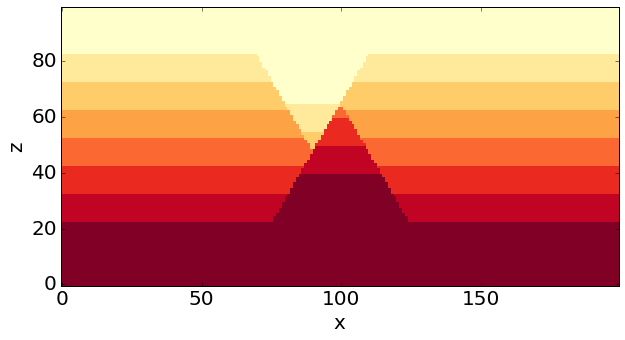

In [24]:
# Plot output
reload(pynoddy.output)
nout = pynoddy.output.NoddyOutput(output_name)
nout.plot_section('y', layer_labels = strati_options['layer_names'][::-1], 
                  colorbar = True, title="",
                  savefig = True, fig_filename = "ex01_faults_combined.eps",
                  cmap = 'YlOrRd') # note: YlOrRd colourmap should be suitable for colorblindness!
